In [92]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

#Library for saving data
import pickle

#other libraries
import pandas as pd
import numpy as np

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [93]:

df=pd.read_csv('census_income.csv')
df.head(100)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
96,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
97,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K
98,32,Federal-gov,249409,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K


In [94]:
#show all columns in dataframe
pd.set_option('display.max_columns', None)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


There are 15 columns

# Checking columns with single unique values

In [95]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column    value                    
Education  Preschool             51
           1st-4th              168
           5th-6th              333
           Doctorate            413
           12th                 433
...                             ...
Workclass  State-gov           1297
           ?                   1836
           Local-gov           2093
           Self-emp-not-inc    2541
           Private            22696

[104 rows x 1 columns]

In [96]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

There are no columns with 1 unique values

# Understanding data

In [97]:
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Observations:

1.There are 32560 datas and doesnt seem to have any null values

2.6 continous datas and rest 9 categorical

3.Capital gain shows large variation between mean and median showing presence of outliers

# Seperating numerical and categorical datas

In [98]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [99]:
num=df[{'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'}]
num

,Age,Capital_gain,Fnlwgt,Capital_loss,Education_num,Hours_per_week
0,50,0,83311,0,13,13
1,38,0,215646,0,9,40
2,53,0,234721,0,7,40
3,28,0,338409,0,13,40
4,37,0,284582,0,14,40
...,...,...,...,...,...,...
32555,27,0,257302,0,12,38
32556,40,0,154374,0,9,40
32557,58,0,151910,0,9,40
32558,22,0,201490,0,9,20


In [100]:
df.select_dtypes(exclude=["number"]).columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [101]:
cat=df[{'Workclass', 'Education', 'Marital_status', 'Occupation','Relationship', 'Race', 'Sex', 'Native_country', 'Income'}]
cat

,Race,Income,Occupation,Marital_status,Relationship,Education,Native_country,Sex,Workclass
0,White,<=50K,Exec-managerial,Married-civ-spouse,Husband,Bachelors,United-States,Male,Self-emp-not-inc
1,White,<=50K,Handlers-cleaners,Divorced,Not-in-family,HS-grad,United-States,Male,Private
2,Black,<=50K,Handlers-cleaners,Married-civ-spouse,Husband,11th,United-States,Male,Private
3,Black,<=50K,Prof-specialty,Married-civ-spouse,Wife,Bachelors,Cuba,Female,Private
4,White,<=50K,Exec-managerial,Married-civ-spouse,Wife,Masters,United-States,Female,Private
...,...,...,...,...,...,...,...,...,...
32555,White,<=50K,Tech-support,Married-civ-spouse,Wife,Assoc-acdm,United-States,Female,Private
32556,White,>50K,Machine-op-inspct,Married-civ-spouse,Husband,HS-grad,United-States,Male,Private
32557,White,<=50K,Adm-clerical,Widowed,Unmarried,HS-grad,United-States,Female,Private
32558,White,<=50K,Adm-clerical,Never-married,Own-child,HS-grad,United-States,Male,Private


# EDA

In [102]:
#checking nan
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [103]:
#removing duplicate values
df.drop_duplicates(inplace=True)

No outliers present

# Understanding the categorical columns

In [104]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the income column
df["Income"]=lab_enc.fit_transform(df['Income'])


1 is >50K

0 is <=50K

In [105]:
cat=df[{'Workclass', 'Education', 'Marital_status', 'Occupation','Relationship', 'Race', 'Sex', 'Native_country', 'Income'}]



In [106]:
cat['Workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

It has a ? in it

In [136]:
#substituting the ? with mode
df['Workclass'] = df['Workclass'].str.replace('?', 'United-States')

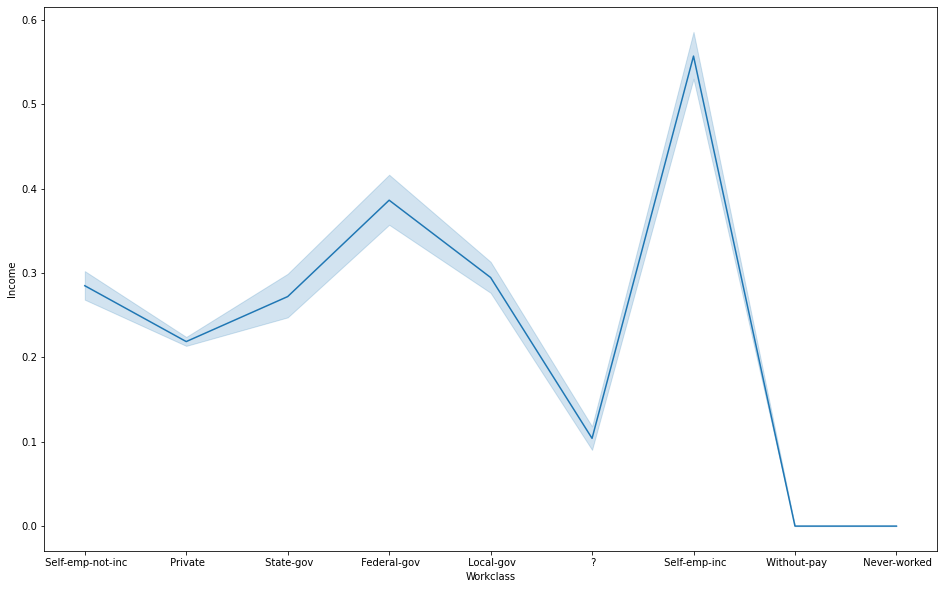

In [107]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Workclass",y="Income",data=df)
plt.show()

The highest income is for Self-emp-inc

In [108]:
cat['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

In [109]:
# education Category
df["Education"]= df.Education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df["Education"] = df.Education.replace('HS-grad', 'high school')
df["Education"]= df.Education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'Higher Education')


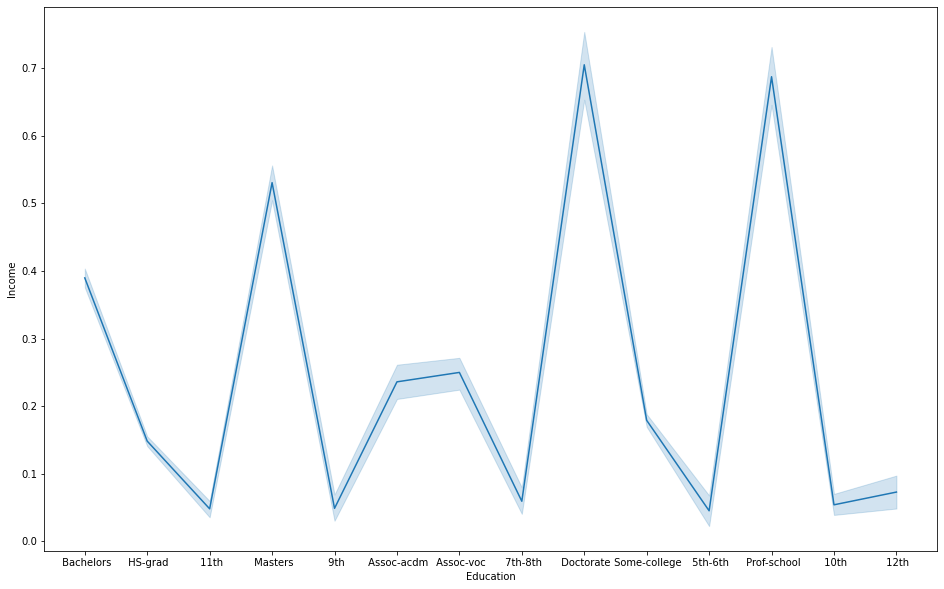

In [137]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Education",y="Income",data=df)
plt.show()

Doctrate and Prof-school has highest income

In [110]:
cat['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [111]:
df['Marital_status']= df['Marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')

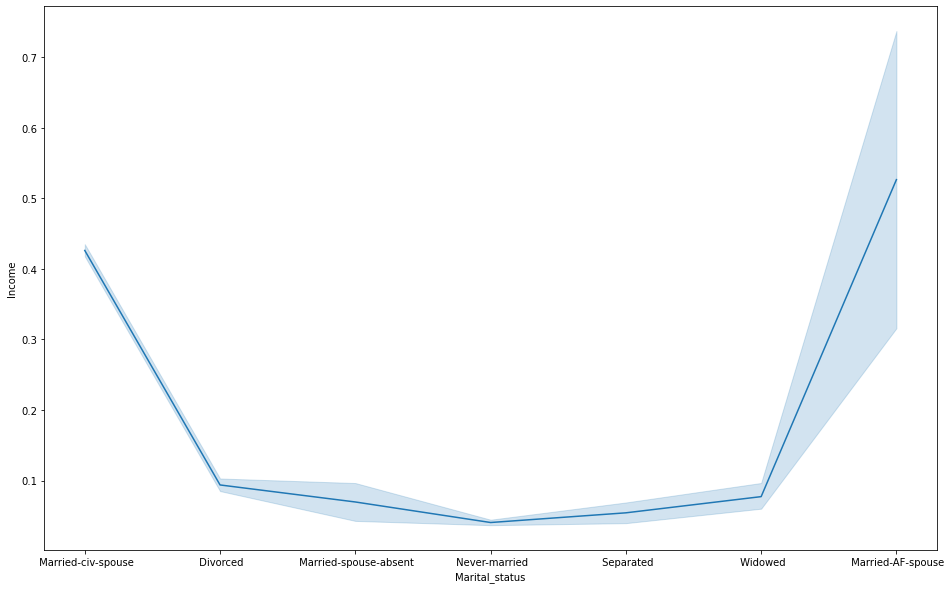

In [138]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Marital_status",y="Income",data=df)
plt.show()

Married people have highest income

In [112]:
cat['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

It has ? in it

In [113]:
df['Occupation'] = df['Occupation'].str.replace('?', 'Prof-specialty')

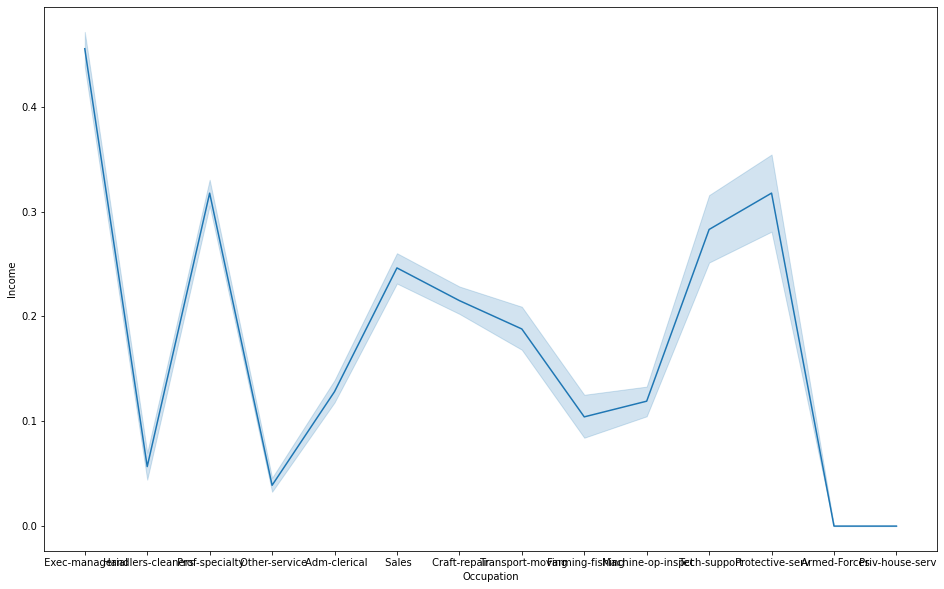

In [139]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Occupation",y="Income",data=df)
plt.show()

Highest income is for Exec-managerial

In [114]:
cat['Relationship'].value_counts()

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

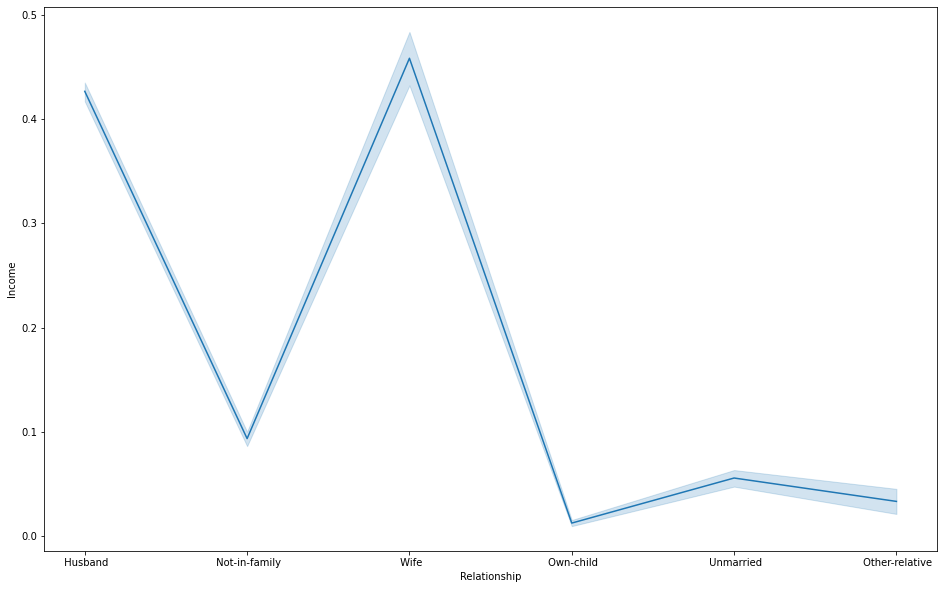

In [141]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Relationship",y="Income",data=df)
plt.show()

Highest income is for married Wife with no child and married husband with no child

In [115]:
cat['Race'].value_counts()

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

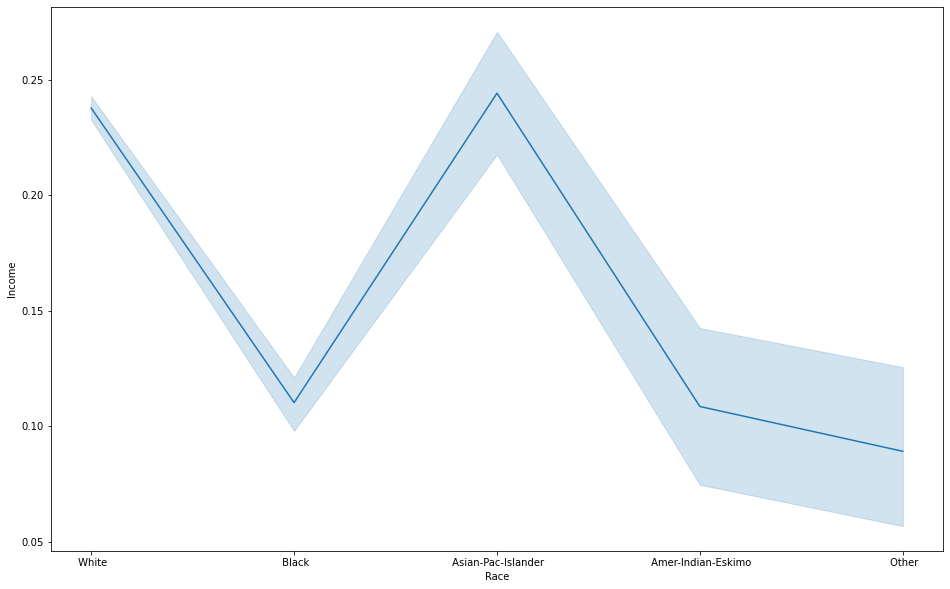

In [142]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Race",y="Income",data=df)
plt.show()

Highest salary is for Asian Pac Islander

In [116]:
cat['Sex'].value_counts()

 Male      21774
 Female    10762
Name: Sex, dtype: int64

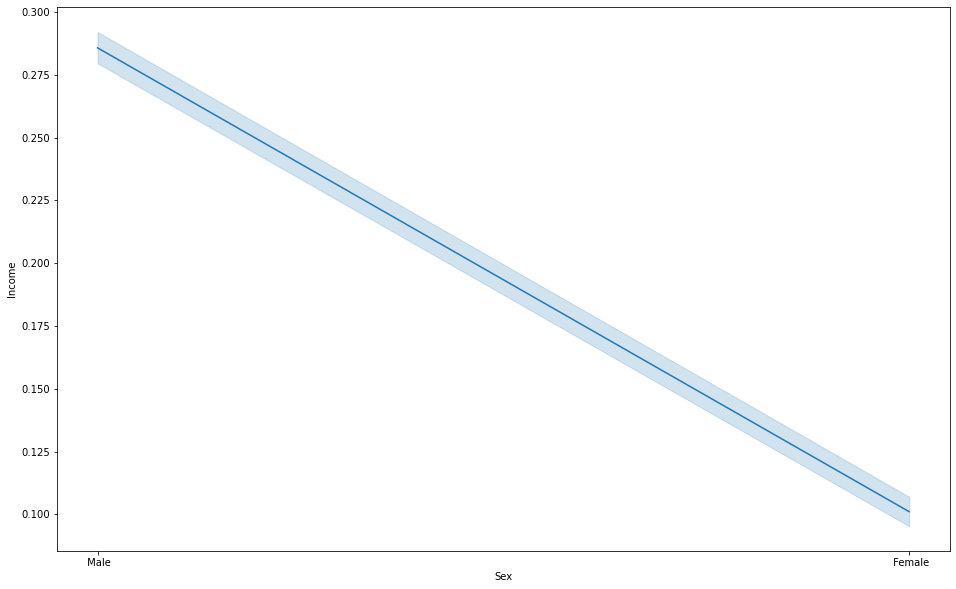

In [143]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Sex",y="Income",data=df)
plt.show()

Highest salary for male

In [117]:
cat['Native_country'].value_counts()

 United-States                 29152
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

it has ? in it

In [118]:
df['Native_country'] = df['Native_country'].str.replace('?', 'United-States')

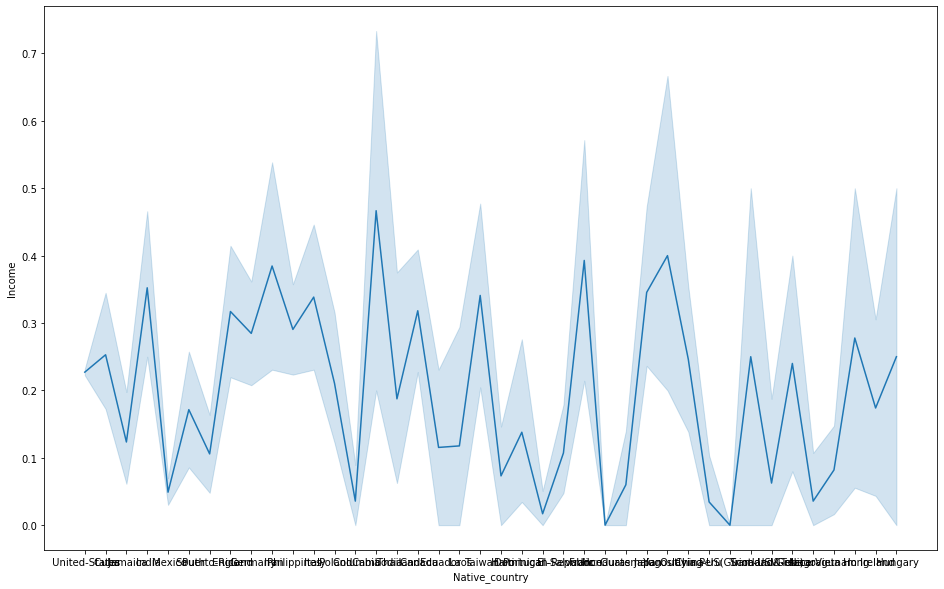

In [144]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Native_country",y="Income",data=df)
plt.show()

In [119]:
cat['Income'].value_counts()

0    24697
1     7839
Name: Income, dtype: int64

class is imbalanced

1 is >50K

0 is <=50K

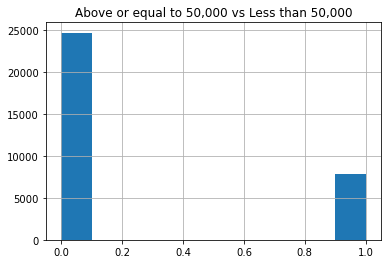

In [121]:
#checking class imbalance
df["Income"].hist(grid=True)
plt.title("Above or equal to 50,000 vs Less than 50,000")
plt.show()

Class is imbalanced hence better to use ROC AUC score

In [124]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076448,0.036224,0.077676,0.057745,0.068515,0.234039
Fnlwgt,-0.076448,1.000000,-0.043353,0.000433,-0.010267,-0.018900,-0.009521
Education_num,0.036224,-0.043353,1.000000,0.122661,0.079901,0.148426,0.335299
Capital_gain,0.077676,0.000433,0.122661,1.000000,-0.031638,0.078408,0.223340
Capital_loss,0.057745,-0.010267,0.079901,-0.031638,1.000000,0.054229,0.150498
Hours_per_week,0.068515,-0.018900,0.148426,0.078408,0.054229,1.000000,0.229659
Income,0.234039,-0.009521,0.335299,0.223340,0.150498,0.229659,1.000000


# Understanding and eda on numerical data

In [125]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Income'],
      dtype='object')

In [126]:
num=df[{'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss','Hours_per_week'}]

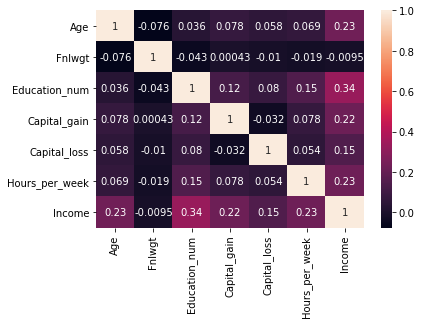

In [127]:
# Multicollinearity
sns.heatmap(df.corr(), annot=True);

In [128]:
#vif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(num)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=num.columns
vif

,quality,feature
0,1.019252,Age
1,1.026715,Capital_gain
2,1.007758,Fnlwgt
3,1.013461,Capital_loss
4,1.043769,Education_num
5,1.031975,Hours_per_week


No high multicollinearity is seen among the features

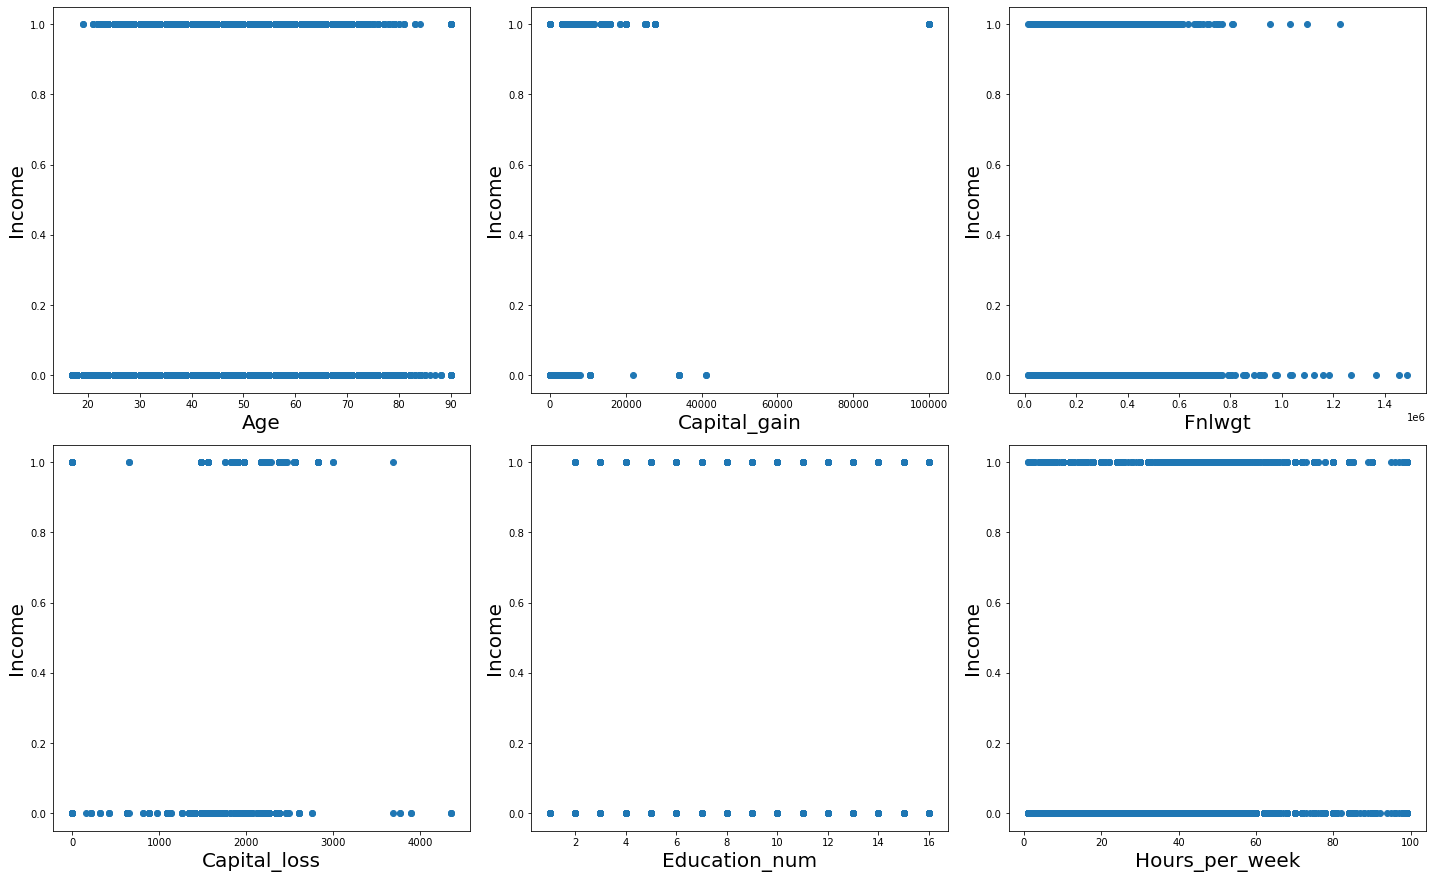

In [129]:
#Analysing the relationship between numerical features and income

y_table=df['Income']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
    plotnumber+=1
plt.tight_layout()

1 is >50K

0 is <=50K

Observation

1.Most of the age group have same impact of salary

2.When capital gains are higher, the salary is higher upto 40,000

3.The Fnwlgt, capital loss, education_num and hours per week have almost the same impact on the income

In [145]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.318731
Capital_gain      0.282585
Age               0.239314
Hours_per_week    0.230589
Fnlwgt           -0.000896
Capital_loss     -0.017458
Name: Income, dtype: float64

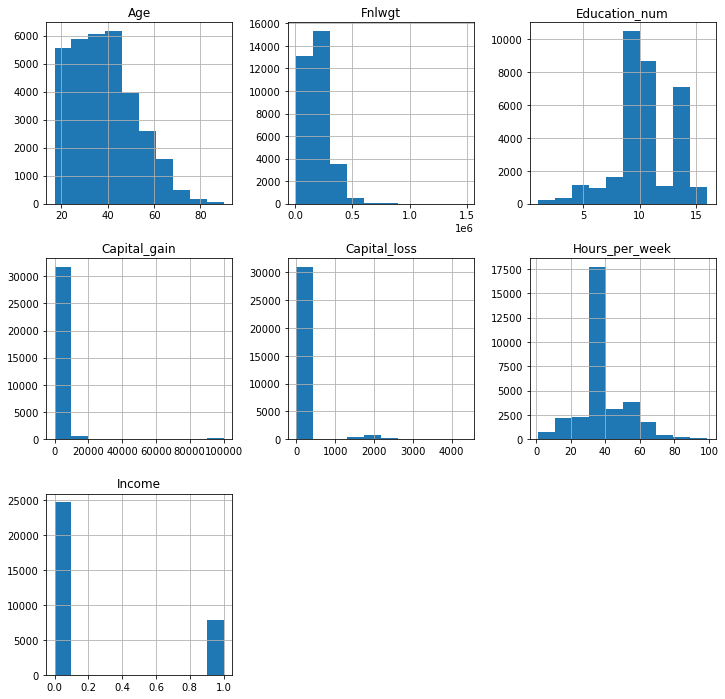

In [130]:
# Histogram- understanding the numerical data
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

Observations

1.High skewess is seen in some of the features

2.Age varies between 18 to 89 and the income is highest in the 45years age 

3.Education_num 10 is highest

4.Capital gain is highest in 10,000

5.Highest capital loss is between 0 and 500

6.Highest per week is between 30 and 40

In [131]:
#finding and reducing outliers and skewness

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  32536
columns after applying zscore:  29808


In [132]:
df=df_new

In [133]:
df.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
Income             1.329852
dtype: float64

Capital_gain and capital_loss has very high skewness

In [134]:
#removing skewness using log1p
num=df[{'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss','Hours_per_week'}]

for col in num:
    if num.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [135]:
df.skew()

Age                0.491125
Fnlwgt            -0.953232
Education_num     -0.169811
Capital_gain       3.115925
Capital_loss      25.102455
Hours_per_week    -0.353124
Income             1.329852
dtype: float64

After applying transform also the skewness is high, hence if the accuracy is too low we can drop it

# Encoding

In [146]:
#one hot encoding on data
df=pd.get_dummies(df)

#standardising the data for PCA
x=df.drop(columns=["Income"])
y=df['Income']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  4.42785118,   7.31649143,   9.84311006,  12.18171684,
        14.04576373,  15.78176783,  17.44495276,  18.97423599,
        20.40259878,  21.74970087,  23.07342543,  24.31218296,
        25.54577964,  26.74230932,  27.92852149,  29.10721253,
        30.25550965,  31.40005798,  32.51005592,  33.61476351,
        34.71491136,  35.80089256,  36.87617704,  37.94215805,
        39.00147778,  40.05420175,  41.10263347,  42.14654236,
        43.18528824,  44.21643658,  45.24405777,  46.26727451,
        47.28589024,  48.30192626,  49.3131767 ,  50.31968891,
        51.31776685,  52.31551431,  53.31060958,  54.30028707,
        55.2880171 ,  56.2742665 ,  57.25949228,  58.24371689,
        59.22595055,  60.2079033 ,  61.18962044,  62.17117438,
        63.15237501,  64.13328443,  65.11334748,  66.09304277,
        67.07251124,  68.05089293,  69.02770505,  70.00363423,
        70.97863854,  71.95330147,  72.92506495,  73.89559717,
        74.86206681,  75.82564342,  76.7867694 ,  77.74

In [148]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  83


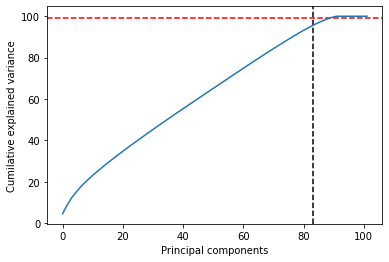

In [149]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [150]:
# Creating final dataset with 85 columns

FinalPCA=PCA(n_components=85)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,2.935760,-1.690890,-0.175795,0.280397,-0.054860,0.670401,1.104488,1.081027,-0.313599,-2.108297,0.853232,-0.493057,0.134224,-0.161394,0.432881,-0.653178,1.392876,0.564367,-0.548408,0.590635,-0.423755,-0.455450,-0.979074,0.215247,0.271308,0.737677,-0.470488,0.262430,0.140940,-0.524590,0.229281,-0.386134,0.336486,0.832850,-0.219956,0.052687,1.121874,0.020004,-0.236180,0.081122,-0.211334,-0.034224,-0.272026,-0.082489,-0.060853,-0.045685,0.023207,-0.073126,-0.099702,-0.217188,0.016827,-0.062548,-0.240870,0.062446,0.299475,0.126341,-0.172217,-0.528321,0.093869,0.063865,0.421337,-0.140797,0.222079,0.384343,-0.055909,-0.625542,-0.077259,-0.515930,0.248307,-0.044451,-0.109663,-0.714929,0.577458,0.354668,-0.278759,-0.323920,0.315303,-0.360948,-0.174607,1.421242,-0.651962,1.715351,-0.769903,-0.289933,1.916361
1,-0.640641,1.002580,-1.028946,-0.836348,0.331482,1.102316,-2.611555,-0.092861,0.552318,1.293517,0.461643,-0.476821,-0.110880,-0.285994,-0.553708,0.648025,0.349360,-0.195820,0.477194,-1.161488,-0.325302,0.794292,-0.006855,0.595061,0.922662,0.125085,0.300568,1.033709,-0.408916,0.222439,-1.293451,-0.531651,-0.975241,1.320133,-0.519443,1.983302,0.013151,-0.735654,0.448829,-0.633180,0.004933,0.155663,0.166334,-0.126998,-0.115688,0.194785,0.173834,0.076441,0.088349,0.069769,0.022238,-0.096457,0.231474,-0.516773,-0.259217,0.465029,0.079355,-0.405591,-0.406881,-0.235923,0.031517,-0.595707,-0.052903,1.836033,-0.491315,-0.068854,-0.306390,-0.618193,-0.589937,-1.118012,0.045043,-0.303933,0.501679,-0.178987,0.678408,0.725863,0.120564,0.441587,0.123191,0.217819,0.145493,0.876968,-0.203378,-0.155951,-0.566992
2,0.881550,2.606126,1.040516,-0.270256,-2.891669,-0.831936,-0.011584,-2.365091,0.576040,-1.145760,-0.680305,-0.979548,-0.151152,-0.572544,-0.096840,0.531928,1.239574,1.051802,0.480759,-1.740590,-0.112577,1.526038,0.190764,1.052876,2.104381,0.165300,-0.114197,0.754581,-1.226214,-1.845389,-1.746016,-1.177465,0.604006,1.166015,0.168965,0.968676,0.465359,-1.575078,0.681954,-0.252554,0.240918,0.173265,0.050675,-0.269641,-0.081277,0.053607,-0.012701,0.125210,-0.030166,-0.131641,-0.134460,0.072060,-0.276901,-0.484306,-0.078517,0.466045,0.150269,-0.874247,-0.453041,0.084739,-0.913173,-0.059138,0.237529,1.054926,-0.873870,0.756816,-0.804155,-0.278271,-1.293703,-1.651375,0.306449,-1.191513,0.033924,-0.095089,-0.273773,0.457327,0.689847,-0.291513,0.750425,-1.156421,0.221181,-0.067068,0.514264,1.231928,-0.121417
3,-1.135884,-1.567425,4.587231,0.801617,1.479131,-2.553041,2.154802,-2.964783,-1.127135,-0.750569,2.460980,0.841123,-0.787479,0.668665,2.483131,0.818058,-0.463565,0.143322,-2.219458,-3.240830,0.028449,-1.193783,-0.477221,-1.000687,-0.273989,1.996629,1.475505,-1.189568,-2.166482,3.931472,-1.857702,1.718889,0.160946,-0.136977,3.615494,2.944550,0.285487,-0.902671,1.555736,2.494197,-5.679377,-3.757215,-6.221165,1.430900,-0.769459,-0.643424,2.346752,4.642396,-1.990712,-0.119564,-1.527952,0.808654,-2.812566,2.429674,-1.463373,-0.984864,-4.541225,-1.187910,3.409858,0.943439,4.968631,-0.676566,0.779106,-1.300224,-1.927044,0.176854,-4.682649,-0.108990,-0.732468,-2.307371,-1.189619,-1.722580,-0.085508,0.172187,-0.170807,0.339487,-0.936985,0.158772,0.572185,-2.614072,-2.783276,-0.556669,2.118395,0.297688,-1.248931
4,0.182904,-2.864342,0.451049,-0.369986,1.448190,-2.957087,1.691869,-0.661590,-0.184830,-0.089866,1.595420,-1.205571,0.374632,0.453402,-0.066666,-0.042149,0.581679,-2.703026,1.814399,-0.404351,0.465719,1.012728,-1.347121,-0.443971,1.222149,0.287667,-0.688242,0.559180,0.152060,0.131591,-0.101939,1.502063,0.528662,-0.035836,-0.119162,-0.014800,0.240189,0.110713,0.457445,0.170142,0.182628,0.298558,0.031440,0.075150,-0.049404,0.067413,-0.040317,-0.089461,-0.028358,-0.138816,0.347427,-0.207199,-0.149515,-0.

In [151]:
df=FinalData2

# Splitting data

In [152]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [153]:
y_train.head()

7104     0
21881    0
17456    0
8318     0
14681    0
Name: Income, dtype: int64

# Finding best random state

In [154]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.854669887278583 on Random State 74


In [155]:
 x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=74)

# Modelling

In [156]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.854669887278583
[[5408  391]
 [ 692  961]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5799
           1       0.71      0.58      0.64      1653

    accuracy                           0.85      7452
   macro avg       0.80      0.76      0.77      7452
weighted avg       0.85      0.85      0.85      7452



In [157]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8114600107353731
[[5057  742]
 [ 663  990]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5799
           1       0.57      0.60      0.58      1653

    accuracy                           0.81      7452
   macro avg       0.73      0.74      0.73      7452
weighted avg       0.81      0.81      0.81      7452



In [158]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8514492753623188
[[5370  429]
 [ 678  975]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5799
           1       0.69      0.59      0.64      1653

    accuracy                           0.85      7452
   macro avg       0.79      0.76      0.77      7452
weighted avg       0.84      0.85      0.85      7452



In [159]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8488996242619431
[[5419  380]
 [ 746  907]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5799
           1       0.70      0.55      0.62      1653

    accuracy                           0.85      7452
   macro avg       0.79      0.74      0.76      7452
weighted avg       0.84      0.85      0.84      7452



In [160]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.8428275685053599
Cross validation score of Decision Tree model : 0.8078034902140667
Cross validation score of Random Forest model : 0.8491681617644286
Cross validation score of SVC model : 0.8410160114320181


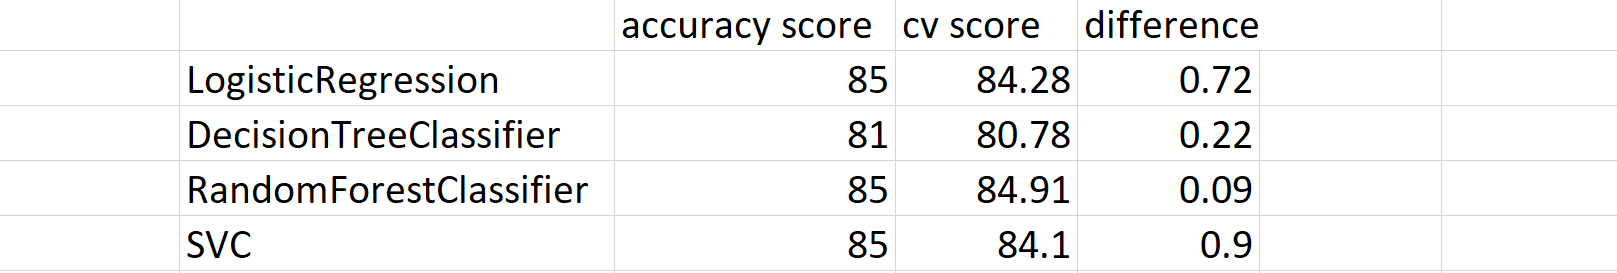

The difference is least for RandomForestClassifier

# ROC AUC curve

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

print("Logistic regression score is: ",lr.score(x_test,y_test))
print("Decision tree score is ",dt.score(x_test,y_test))
print("Random forest score is",rf.score(x_test,y_test))
print("K-neighbour score is",kn.score(x_test,y_test))

Logistic regression score is:  0.854669887278583
Decision tree score is  0.8129361245303274
Random forest score is 0.8507783145464305
K-neighbour score is 0.831454643048846


In [162]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.7596606712027764

In [163]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.7569708964778644

In [164]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.743352083045797

In [165]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.73491361706083

the AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier.

The AUC score shows that RandomForestClassifer is the best classifier among this.

# Hyperparameter tuning

In [166]:
#HyperParameter tuning
from sklearn.model_selection import GridSearchCV 
paramters={'n_estimators':[2,3,4,5],
           'criterion':['gini','entropy'],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5,6],
           'max_leaf_nodes':[2,3,4,5,10],
}

GCV=GridSearchCV(RandomForestClassifier(),paramters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]})

In [167]:
GCV.best_params_

{'criterion': 'gini',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 5}

In [169]:
mod=RandomForestClassifier(criterion='gini',max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=2,n_estimators=5)

In [170]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

83.45410628019324


In [171]:
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

# Saving of model

In [172]:
filename='finalized_model.pickle'
pickle.dump(classifier,open(filename,'wb'))

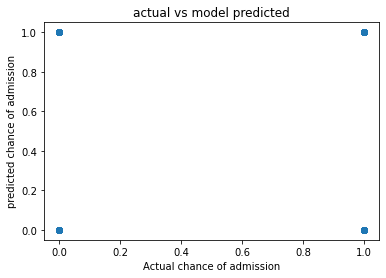

In [174]:
#Adjusted accuracy
classifier.score(x_train,y_train)
y_pred=classifier.predict(x_test)
plt.scatter(y_test,y_pred)

plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [175]:
print(confusion_matrix(y_test, y_pred))

[[5375  424]
 [ 664  989]]


In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5799
           1       0.70      0.60      0.65      1653

    accuracy                           0.85      7452
   macro avg       0.79      0.76      0.78      7452
weighted avg       0.85      0.85      0.85      7452



In [177]:
print('Precision =' , 5375/(5375+664))

Precision = 0.8900480211955621


In [178]:
print('Recall =', 5375/(5375+424))

Recall = 0.9268839455078461
